<a href="https://colab.research.google.com/github/PerezTorresJhoyceR/IA_Sis420/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss']
    se usaran estos datos, para la prediccion


Se carga el dataset desde Google Drive y se inspeccionan los nombres de las columnas para seleccionar únicamente aquellas que son numéricas y relevantes para el modelo. Se binariza la variable objetivo income, convirtiéndola en 1 si el ingreso es mayor a $50 000 y 0 en caso contrario.


In [8]:
# Montar Google Drive
from google.colab import drive
drive.mount("/content/drive" , force_remount=True)

# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#  Cargar dataset desde Drive
df = pd.read_csv('/content/drive/MyDrive/IA/adult.csv')
print(df.columns.tolist())



Mounted at /content/drive
['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']


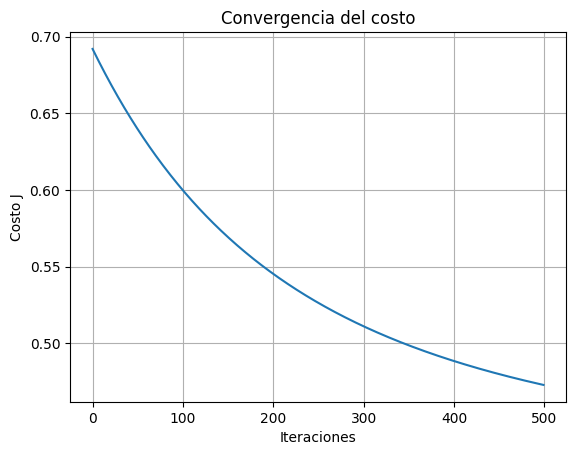

Precisión del modelo en prueba: 80.36%


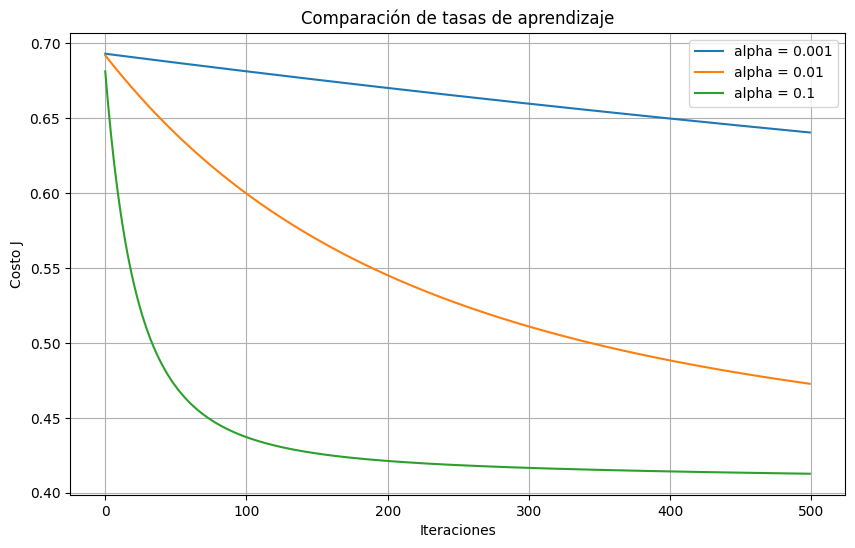

In [9]:

#  Seleccionar características numéricas
features = ['age', 'education.num', 'hours.per.week', 'capital.gain', 'capital.loss']
X = df[features].values
y = (df['income'] == '>50K').astype(int).values  # binarizamos la etiqueta

# Normalizar características
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Agregar columna de unos (intercepto)
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1)

# Dividir en entrenamiento y prueba (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de costo
def calcularCosto(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = (1/m) * np.sum(-y*np.log(h) - (1 - y)*np.log(1 - h))
    return J

# Gradiente descendente
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.size
    J_history = []
    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        theta -= (alpha/m) * X.T.dot(h - y)
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

#  Entrenamiento
# Se entrena el modelo durante 500 iteraciones con una tasa de aprendizaje inicial de 0.01.
# Se registra el valor del costo en cada iteración y se grafica para observar la convergencia del algoritmo.
theta = np.zeros(n + 1)
alpha = 0.01
num_iters = 500
theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

# Visualización del costo
plt.plot(np.arange(len(J_history)), J_history)
plt.xlabel('Iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia del costo')
plt.grid(True)
plt.show()

# Predicción
def predict(theta, X):
    return (sigmoid(X.dot(theta)) >= 0.5).astype(int)

# Evaluación
y_pred = predict(theta, X_test)
accuracy = np.mean(y_pred == y_test) * 100
print(f'Precisión del modelo en prueba: {accuracy:.2f}%')

# Comparación de tasas de aprendizaje
# Se entrena el modelo con tres tasas de aprendizaje distintas (0.001, 0.01, 0.1) y se grafica el costo para cada caso.
alphas = [0.001, 0.01, 0.1]
theta_init = np.zeros(X_train.shape[1])
plt.figure(figsize=(10,6))

for alpha in alphas:
    theta = theta_init.copy()
    theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)
    plt.plot(J_history, label=f'alpha = {alpha}')

plt.xlabel('Iteraciones')
plt.ylabel('Costo J')
plt.title('Comparación de tasas de aprendizaje')
plt.legend()
plt.grid(True)
plt.show()

el primer grafico: se puede ver como disminuye la funcion de costo en las iteraciones, lo cual indica que esta aprendiendo de manera correcta, 0.01 es muy estable

en el 2do grafico : se puede ver como aprende con diferentes alphas  con 0.001 es un aprendizaje muy lento, el 0.01 es el más estable y el de 0.1 tiene una convergencia muy rápida lo cual puede ser malo y se podria generar sobreajustes.